In [4]:
#%matplotlib notebook use for 3D visulaization
#use for 2D visulaization
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pandas.tools.plotting import parallel_coordinates

In [5]:
df = pd.read_csv('FRIENDSS07E01.mkv.embedding.txt', header = None, sep=" ")

print(len(df.columns))

colnames = ['timestamp', 'faceID']
for i in range(0,len(df.columns)-2):
    colnames.append(i)
df.columns = colnames
# print(df.head())

Xdf = df.drop(['timestamp','faceID'], axis = 1)
print(Xdf.head())


130
       0        1        2        3        4        5        6        7    \
0  0.04942  0.15537  0.10378  0.00315 -0.07684  0.10930 -0.12012  0.00998   
1  0.01851  0.15563  0.09439  0.01074 -0.06508  0.08417 -0.12596 -0.01034   
2  0.01082  0.15771  0.09700  0.01199 -0.07037  0.08370 -0.12972 -0.02015   
3  0.00344  0.15708  0.08983  0.01667 -0.07002  0.08982 -0.11281 -0.02076   
4  0.00818  0.14428  0.10062  0.01288 -0.08022  0.08662 -0.12081  0.00925   

       8        9     ...         118      119      120      121      122  \
0  0.17949 -0.09937   ...     0.05148  0.05036 -0.04160 -0.05253 -0.09725   
1  0.19764 -0.08946   ...     0.04244  0.04003 -0.03361 -0.05451 -0.11319   
2  0.18503 -0.09199   ...     0.06290  0.02991 -0.01434 -0.05083 -0.09576   
3  0.18709 -0.10330   ...     0.07529  0.03276 -0.00964 -0.03383 -0.10586   
4  0.18712 -0.08958   ...     0.06415  0.03853 -0.01679 -0.04237 -0.10121   

       123      124      125      126      127  
0 -0.12206 -0.00535 -

In [45]:
X = []
for i in range(0,len(Xdf.index)):
    X.append(np.array(Xdf.iloc[i]))
X = np.array(X)
print(X)

[[ 0.04942  0.15537  0.10378 ..., -0.04487  0.03427  0.00092]
 [ 0.01851  0.15563  0.09439 ..., -0.03154  0.04304  0.01308]
 [ 0.01082  0.15771  0.097   ..., -0.05127  0.0453   0.0249 ]
 ..., 
 [-0.08009  0.18752  0.08897 ..., -0.11762  0.0632   0.10109]
 [-0.03158  0.11401  0.05489 ..., -0.09667 -0.01233 -0.00733]
 [-0.08275  0.17119  0.09274 ..., -0.11022  0.05484  0.08971]]


In [71]:
clf = DBSCAN(eps = 0.30)
clf.fit(X)
y = clf.labels_
print(y)
#X = preprocessing.scale(X) # No effect of preprocessing before or after fitting

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  1  0  1  1  0  0  1  0  1  0  1  1  0  1  0  0  1  0  1  0  1
  0  1  1  0  0  1  0  1  0  1  1  0  0  1  0 -1  0 -1  0  1  0  1  0  1  0
  1  0  1  1  0  0  1  0  1  0  1  1  0  0  1  0  1  0  1  1  0  1  0  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  1  0  0  1  0  1  0  1  0  1  0
  1 -1  1]


In [72]:
#2-dimensional LDA
lda = LDA(n_components=2)
lda.fit(X,y)
# print(X)
X_2d = pd.DataFrame(lda.transform(X))
# print(X_2d)
X_2d['labels']=y.tolist()
# print(X_2d.head())

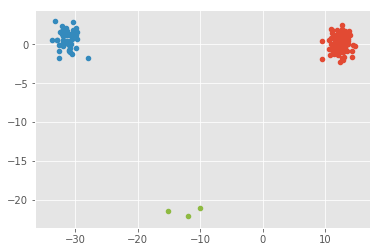

In [73]:
#Plotting the data point
colors = 10* ['C0', 'C1', 'C2', 'C3', 'C4', 'C5',]

#1. For 3d Plotting
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, projection='3d')
# for label in set(y):
#     color = colors[label]
#     for i in range(0,len(X_2d.index)):
#         if (X_2d.iloc[i][2] == label):
#             ax1.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1],X_2d.iloc[i][2], marker="o", color=color, s=10, linewidths=5)
# plt.show()

for label in set(y):
    color = colors[label]
    for i in range(0,len(X_2d.index)):
        if (X_2d.iloc[i][2] == label):
            plt.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1], marker=".", color=color, s=50, linewidths=2)
plt.show()